## Procesamiento y extracción de características de una señal EEG 

#### Importación de librerías

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import neurokit2 as nk
import biosignalsnotebooks as bsnb


from scipy.signal import spectrogram, welch
from scipy.signal import iirnotch, lfilter


#### Importación de la señal

In [192]:
SenalEEG = np.genfromtxt("Signal/EEG_Toma2_ejercicios.txt", delimiter ="\t", skip_header=3)
Fs = 100
EEG = SenalEEG[:,5]

t = bsnb.generate_time(EEG, Fs)


#Función de transferencia 
Gemg = 41782
Vcc = 3.3
n = 10

EEG = (((EEG/2**n)-(1/2))*Vcc)/Gemg
EEG = EEG * (1*10**6)

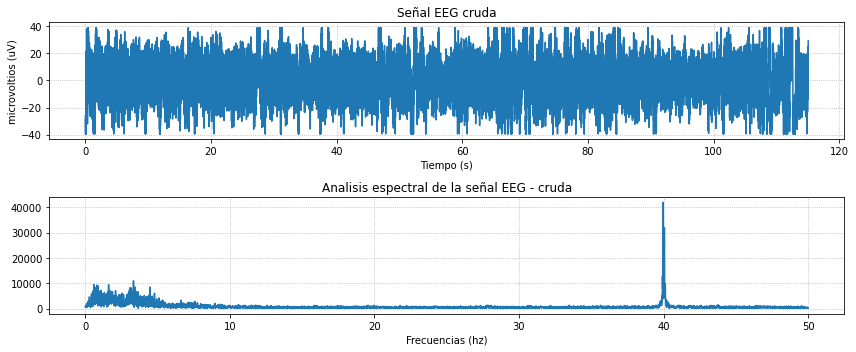

In [193]:
#Transformada de Fourier
freq_axis_1, power_spect_1 = bsnb.plotfft(EEG, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(t,EEG)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Señal EEG cruda")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EEG - cruda")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_1, power_spect_1)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EEGyFFT_crudo.png', transparent=False, )
plt.show()

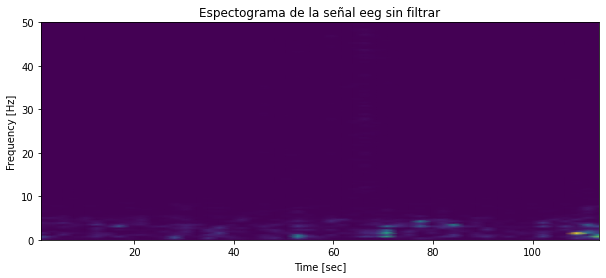

In [205]:
f, t, Sxx = spectrogram(EEG, fs = Fs)

plt.figure(figsize=(10,4))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title("Espectograma de la señal eeg sin filtrar")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('Espectograma', transparent=False, )
plt.show()


#### Filtrado y separación por bandas

In [195]:
# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 40.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
EEG = lfilter(b, a, EEG)
EEG = lfilter(b, a, EEG)

Delta_band = bsnb.bandpass(EEG, f1=1,f2=4, order=2, fs=Fs)
Theta_band = bsnb.bandpass(EEG, f1=4,f2=8, order=2, fs=Fs)
Alpha_band = bsnb.bandpass(EEG, f1=8,f2=13, order=2, fs=Fs)
Beta_band = bsnb.bandpass(EEG, f1=13,f2=30, order=2, fs=Fs)
Gamma_band = bsnb.bandpass(EEG, f1=30,f2=49, order=2, fs=Fs)



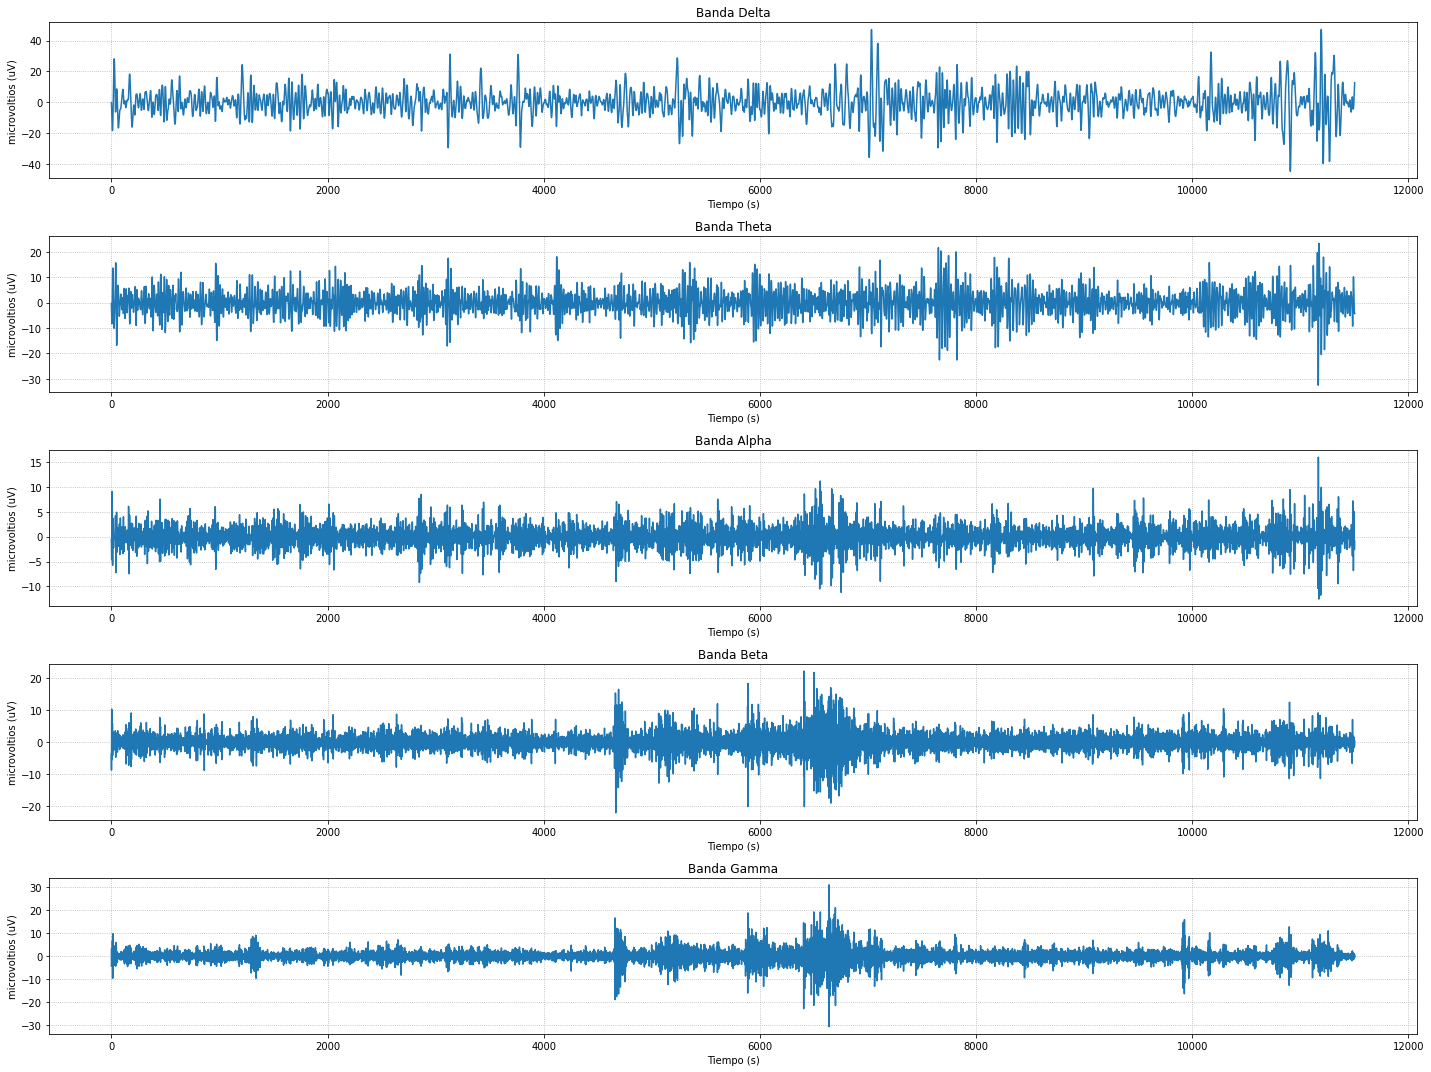

In [206]:

#Banda Delta
plt.figure(figsize=(20,15))
plt.subplot(511)
plt.subplots_adjust(hspace=1)
plt.plot(Delta_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Banda Delta")

#Banda Theta
plt.subplot(512)
plt.plot(Theta_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Banda Theta")

#Banda Alpha
plt.subplot(513)
plt.plot(Alpha_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Banda Alpha")

#Banda Beta
plt.subplot(514)
plt.plot(Beta_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Banda Beta")

#Banda Gamma
plt.subplot(515)
plt.plot(Gamma_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Señal EEG filtrada")
plt.title("Banda Gamma")
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('BandasEEG.png', transparent=False, )

In [197]:
f1, t1, Sxx1 = spectrogram(Delta_band, fs = Fs)
f2, t2, Sxx2 = spectrogram(Theta_band, fs = Fs)
f3, t3, Sxx3 = spectrogram(Alpha_band, fs = Fs)
f4, t4, Sxx4 = spectrogram(Beta_band, fs = Fs)
f5, t5, Sxx5 = spectrogram(Gamma_band, fs = Fs)

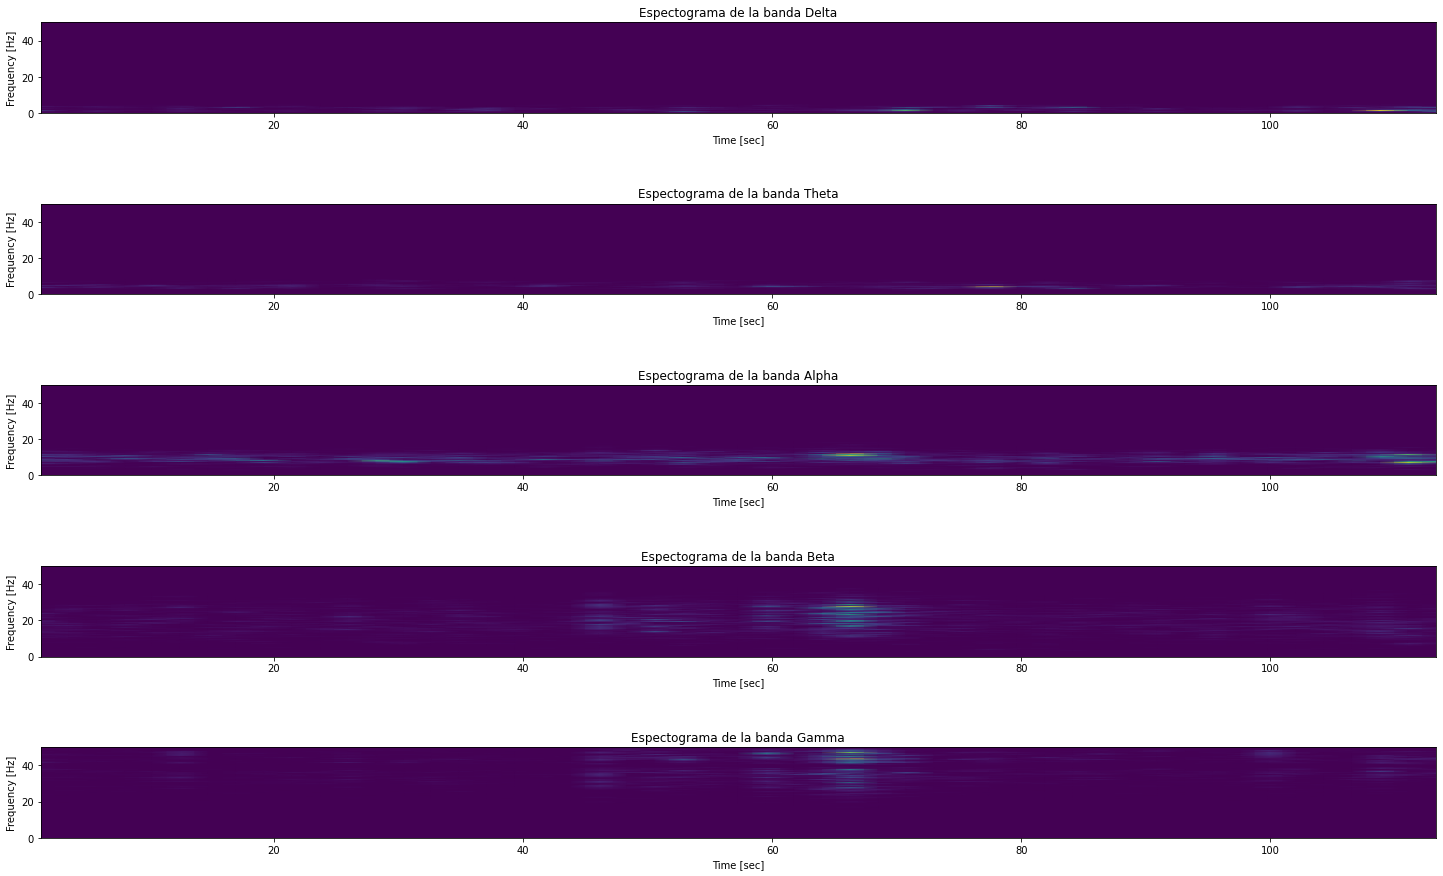

In [207]:
plt.figure(figsize=(25,15))
plt.subplot(511)
plt.subplots_adjust(hspace=1)

#Banda Delta
plt.pcolormesh(t1, f1, Sxx1, shading='gouraud')
plt.title("Espectograma de la banda Delta")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#banda theta
plt.subplot(512)
plt.pcolormesh(t2, f2, Sxx2, shading='gouraud')
plt.title("Espectograma de la banda Theta")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#banda Alpha
plt.subplot(513)
plt.pcolormesh(t3, f3, Sxx3, shading='gouraud')
plt.title("Espectograma de la banda Alpha")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#banda Beta
plt.subplot(514)
plt.pcolormesh(t4, f4, Sxx4, shading='gouraud')
plt.title("Espectograma de la banda Beta")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#Banda Gamma
plt.subplot(515)
plt.pcolormesh(t5, f5, Sxx5, shading='gouraud')
plt.title("Espectograma de la banda Gamma")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('EspectogramaBandas.png', transparent=False, )
plt.show()

#### Extracción de características

##### Banda Delta

In [199]:
from numpy import logical_and, trapz, sqrt
from scipy.integrate import cumtrapz
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax

#Diccionarios
Caracteristicas = {}

#Poder total señal delta
freq_del, power_spect_del = welch(Delta_band, Fs)

#RMS Delta
rmsDel = sqrt(sum(Delta_band * Delta_band) / len(Delta_band))


#Amplitud total
amplTotalDel = np.abs(np.max(Delta_band) - np.min(Delta_band))

#Area
areaDel = cumtrapz(Delta_band)

#power
f, P = welch(Delta_band, fs=Fs, window='hanning', noverlap=0)
area_freq = cumtrapz(P, f, initial=0)
total_power = sum(abs(Delta_band**2)) / len(Delta_band)
median_freq = f[where(area_freq >= total_power / 2)[0][0]]
f_max = f[argmax(P)]

Caracteristicas = {
    'Delta':{
        'RMS':rmsDel,
        'Amplitude Total': amplTotalDel,
        'Frequency Maxima': f_max,
        'Mediana Frequencia': median_freq,
        'Area': abs(areaDel[-1]),
        'Power': total_power
    }
}
   

##### Banda Theta

In [200]:

#Poder total señal delta
freq_the, power_spect_the = welch(Theta_band, Fs)


#RMS Delta
rmsthe = sqrt(sum(Theta_band * Theta_band) / len(Theta_band))


#Amplitud total
amplTotalThe = np.abs(np.max(Theta_band) - np.min(Theta_band))

#Area
areathe = cumtrapz(Theta_band)


#power, area
f1, P1 = welch(Theta_band, fs=Fs, window='hanning', noverlap=0, nfft=int(256.))
area_freqThe = cumtrapz(P1, f1, initial=0)
total_powerThe = area_freqThe[-1]
median_freqthe = f1[where(area_freqThe >= total_powerThe / 2)[0][0]]
f_maxthe = f1[argmax(P1)]

Caracteristicas['Theta'] = {
    
        'RMS':rmsthe,
        'Amplitude Total': amplTotalThe,
        'Frequency Maxima': f_maxthe,
        'Mediana Frequencia': median_freqthe,
        'Area': abs(areathe[-1]),
        'Power': total_powerThe,
        
}



##### Banda Alpha

In [201]:

#Poder total señal delta
freq_Al, power_spect_al = welch(Alpha_band, Fs)


#RMS Delta
rmsal = sqrt(sum(Alpha_band * Alpha_band) / len(Alpha_band))


#Amplitud total
amplTotalAl = np.abs(np.max(Alpha_band) - np.min(Alpha_band))

#Area
areaAl = cumtrapz(Alpha_band)


#power, area
f2, P2 = welch(Alpha_band, fs=Fs, window='hanning', noverlap=0, nfft=int(256.))
area_freqAl = cumtrapz(P2, f2, initial=0)
total_powerAl = area_freqAl[-1]
median_freqAl = f2[where(area_freqAl >= total_powerAl / 2)[0][0]]
f_maxal = f2[argmax(P2)]

Caracteristicas['Alpha'] = {
    
        'RMS':rmsal,
        'Amplitude Total': amplTotalAl,
        'Frequency Maxima': f_maxal,
        'Mediana Frequencia': median_freqAl,
        'Area': abs(areaAl[-1]),
        'Power': total_powerAl,
        
}



##### Banda Beta

In [202]:

#Poder total señal delta
freq_Bet, power_spect_Bet = welch(Beta_band, Fs)


#RMS Delta
rmsBet = sqrt(sum(Beta_band * Beta_band) / len(Beta_band))


#Amplitud total
amplTotalBet = np.abs(np.max(Beta_band) - np.min(Beta_band))

#Area
areaBet = cumtrapz(Beta_band)


#power, area
f3, P3 = welch(Beta_band, fs=Fs, window='hanning', noverlap=0, nfft=int(256.))
area_freqBet = cumtrapz(P3, f3, initial=0)
total_powerBet = area_freqBet[-1]
median_freqBet = f3[where(area_freqBet >= total_powerBet / 2)[0][0]]
f_maxBet = f3[argmax(P3)]

Caracteristicas['Beta'] = {
    
        'RMS':rmsBet,
        'Amplitude Total': amplTotalBet,
        'Frequency Maxima': f_maxBet,
        'Mediana Frequencia': median_freqBet,
        'Area': abs(areaBet[-1]),
        'Power': total_powerBet,
        
}



##### Banda Gamma

In [203]:

#Poder total señal delta
freq_Gam, power_spect_Gam = welch(Gamma_band, Fs)


#RMS Delta
rmsGam = sqrt(sum(Gamma_band * Gamma_band) / len(Gamma_band))


#Amplitud total
amplTotalGam = np.abs(np.max(Gamma_band) - np.min(Gamma_band))

#Area
areaGam = cumtrapz(Gamma_band)


#power, area
f4, P4 = welch(Gamma_band, fs=Fs, window='hanning', noverlap=0, nfft=int(256.))
area_freqGam = cumtrapz(P4, f4, initial=0)
total_powerGam = area_freqGam[-1]
median_freqGam = f4[where(area_freqGam >= total_powerGam / 2)[0][0]]
f_maxGam = f4[argmax(P4)]

Caracteristicas['Gamma'] = {
    
        'RMS':rmsGam,
        'Amplitude Total': amplTotalGam,
        'Frequency Maxima': f_maxGam,
        'Mediana Frequencia': median_freqGam,
        'Area': abs(areaGam[-1]),
        'Power': total_powerGam,
        
}



In [204]:
import json

print(json.dumps(Caracteristicas, indent=4))

{
    "Delta": {
        "RMS": 8.60409458943018,
        "Amplitude Total": 92.10521720525813,
        "Frequency Maxima": 1.5625,
        "Mediana Frequencia": 2.34375,
        "Area": 20.59814519716526,
        "Power": 74.03044370386169
    },
    "Theta": {
        "RMS": 4.993038294136604,
        "Amplitude Total": 55.98208381461008,
        "Frequency Maxima": 4.6875,
        "Mediana Frequencia": 5.078125,
        "Area": 13.878192804686957,
        "Power": 23.42464929311094
    },
    "Alpha": {
        "RMS": 2.202706918311524,
        "Amplitude Total": 28.516034472412628,
        "Frequency Maxima": 9.375,
        "Mediana Frequencia": 9.765625,
        "Area": 0.7831736835261249,
        "Power": 4.740550613207561
    },
    "Beta": {
        "RMS": 2.708018588694635,
        "Amplitude Total": 44.16391896701212,
        "Frequency Maxima": 19.921875,
        "Mediana Frequencia": 20.703125,
        "Area": 2.6399537858805466,
        "Power": 7.318717615989616
    },
  